#### Importando as bibliotecas
#### logo abaixo escolher o sabnr para modo de visualização

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid') # define o estilo


#### Fazer o upload do arquivo via código


In [54]:
from google.colab import files
arq = files.upload()


Saving AdventureWorks.xlsx to AdventureWorks.xlsx


#### criar o dataframe

In [3]:
df = pd.read_excel('AdventureWorks.xlsx')

#### vendo as primeiras linhas 

In [4]:
print(df)

    Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0   2008-05-09 2008-05-29      199         384       18839  200805093CS607   
1   2008-05-12 2008-05-17      306         384       19051  200805123CS567   
2   2008-05-14 2008-05-20      306         384       19052  200805143CS576   
3   2008-05-21 2008-05-27      306         384       19052  200805213CS576   
4   2008-06-20 2008-06-27      306         384       19053  200806203CS586   
..         ...        ...      ...         ...         ...             ...   
899 2008-03-22 2008-04-04      306        1226       19049  200803224CS555   
900 2008-10-04 2008-10-15      306        1155       19057  200810044CS636   
901 2008-12-11 2008-12-15      306        1155       19060  200812114CS676   
902 2008-12-17 2008-12-21      306        1226       19060  200812174CS676   
903 2008-12-21 2008-12-25      306        1155       19060  200812214CS676   

     Custo Unitário  Preço Unitário  Quantidade  Valor Desconto

#### vendo as quantidades de linahs e colunas

In [ ]:
df.shape

(904, 16)

#### Tipos de dados

In [ ]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

#### Descobrindo o valor total da vendas

In [ ]:
df['Valor Venda'].sum()

5984606.1426

#### E encontrando o custo total

In [11]:
df['custo'] = df['Custo Unitário'].mul(df['Quantidade'])

#### Conferimos se o custo está correto

In [12]:

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,2091.48


#### Vemos o custo total e arredondamos para duas casa apos a virgula

In [13]:
round(df['custo'].sum(),2)

2486783.05

#### Dscobrimos o lucro por produto

#### Vemos a primeira linha para sabr se deu certo




In [14]:
df['Lucro'] = df['Valor Venda']-df['custo']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,2091.48,2456.52


#### Descobrimo o lucro total

In [15]:
round(df['Lucro'].sum(),2)

3497823.09

#### Criando uma coluna para saber o tempo total de dias entre a venda e o nvio

In [16]:
df['tempo envio'] = df['Data Envio']-df['Data Venda']
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20 days,2091.48,2456.52


# Agora queeremos saber o tempo médio d tempo d envio para cada marca.
###### Para isso primiro transformamos o dia eem unidade numérica




In [17]:
df['tempo envio'] = (df['Data Envio']-df['Data Venda']).dt.days
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,2091.48,2456.52


#### Veerificamos se o tempo realmnte está em numero


In [18]:
df['tempo envio'].dtype

dtype('int64')

##### Agora pegamos o tempo médio de envio por marca

In [19]:
round(df.groupby('Marca')['tempo envio'].mean(),2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: tempo envio, dtype: float64

#### Precisamos saber se não ha dados faltantes

In [20]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
tempo envio       0
custo             0
Lucro             0
dtype: int64

#### Podemos descobrir o lucro por ano  marca.

In [22]:
df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

#### Tirando a notação cientifica

In [23]:
pd.options.display.float_format

#### Resetando o index para melhorar a apresentação

In [25]:
lucro_ano = df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


#### Descobrindo o total de produtos vendidos

In [29]:
mais_vendido = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index()
mais_vendido

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


#### Gráfico dos produtos vendidos

Text(0, 0.5, 'Produto')

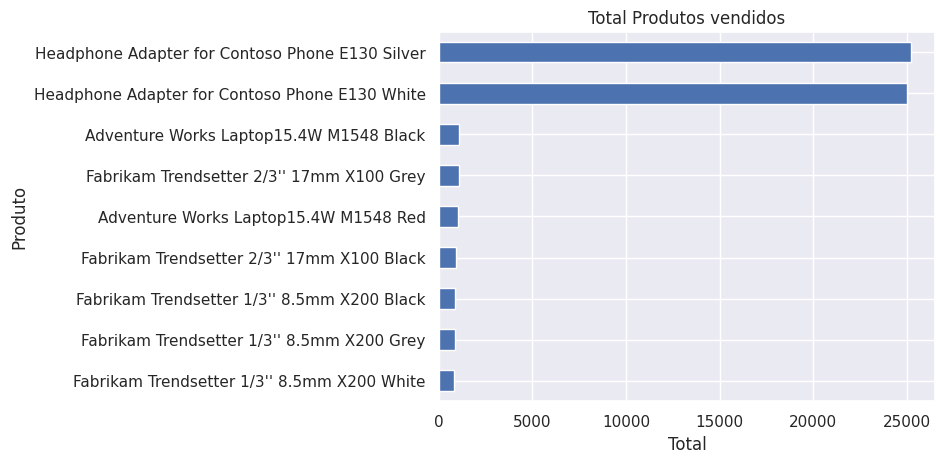

In [32]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total Produtos vendidos')
plt.xlabel('Total')
plt.ylabel('Produto')

#### Vendo o gráfico de lucro por ano

Text(0, 0.5, 'Receita')

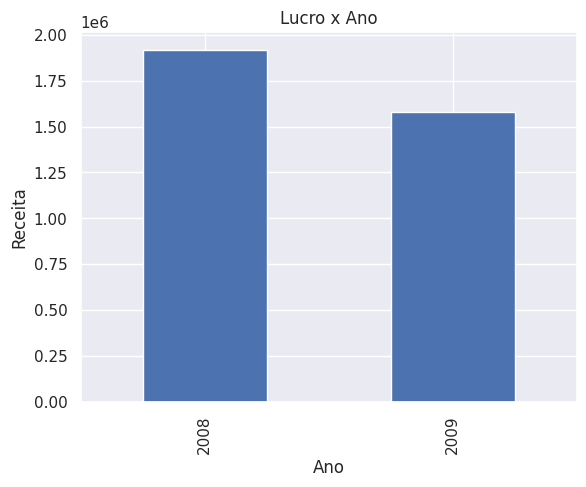

In [35]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita')

#### Agora por mes

Text(0, 0.5, 'Lucro')

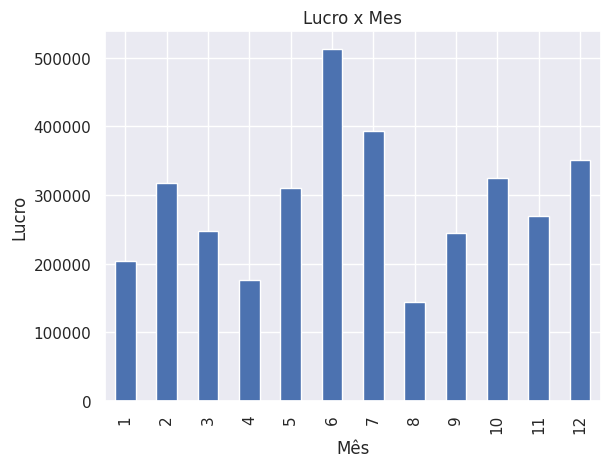

In [36]:
df.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot.bar(title='Lucro x Mes')
plt.xlabel('Mês')
plt.ylabel('Lucro')

#### Separando por ano

In [37]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo,Lucro
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,12,2091.48,2456.52
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,11,2091.48,2456.52
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,12,2091.48,2456.52
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,13,2091.48,2456.52
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4,2091.48,2456.52


#### Vendo as mesmas tabelas para o ano de 2009

Text(0, 0.5, 'Lucro')

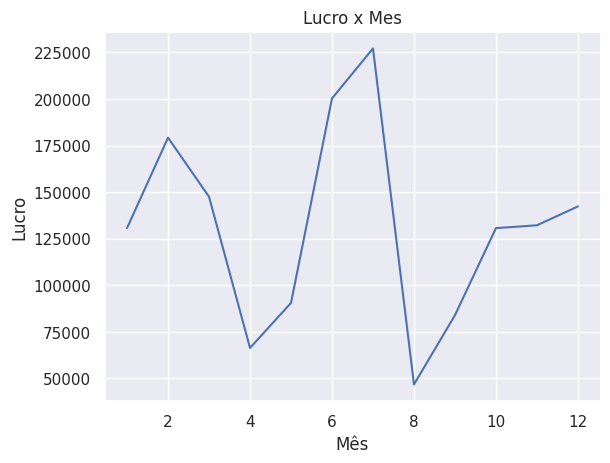

In [41]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mes')
plt.xlabel('Mês')
plt.ylabel('Lucro')

#### Agora por marca em 2009 

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

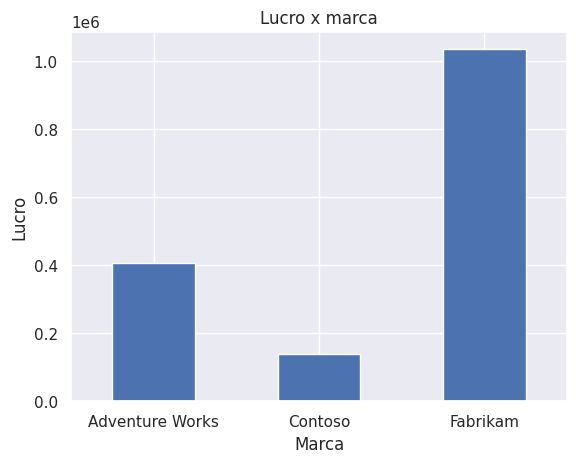

In [38]:
df_2009.groupby(df['Marca'])['Lucro'].sum().plot.bar(title='Lucro x marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')

#### Agora por classe

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

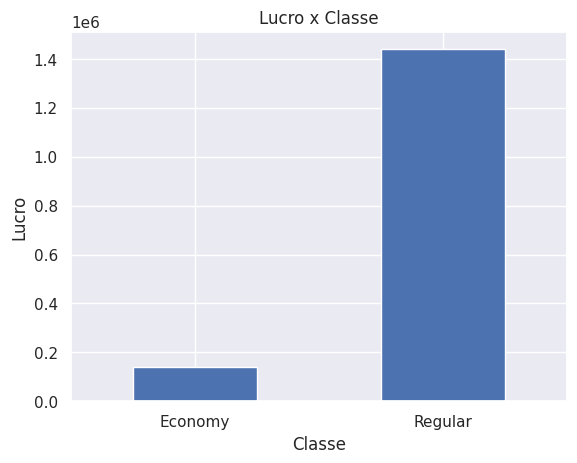

In [40]:
df_2009.groupby(df['Classe'])['Lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')

#### Algumas análises statísticas dos graficos

In [46]:
round(df['tempo envio'].describe(),2)

count    904.00
mean       8.54
std        3.06
min        4.00
25%        6.00
50%        9.00
75%       11.00
max       20.00
Name: tempo envio, dtype: float64

#### Grafico boxplt tempo de envio

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0992c66f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0992c9edf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f098ea3af10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0992c86e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0992b59af0>],
 'means': []}

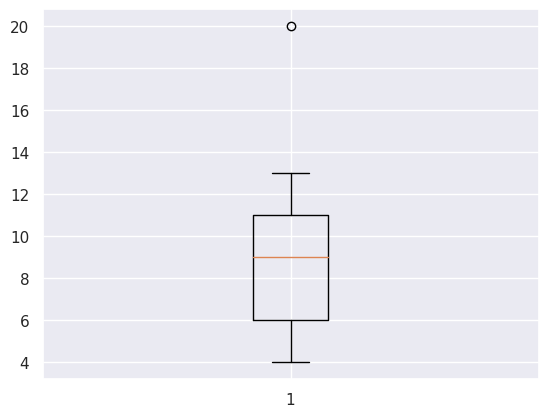

In [47]:
plt.boxplot(df['tempo envio'])

#### Histograma teempo de envio

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

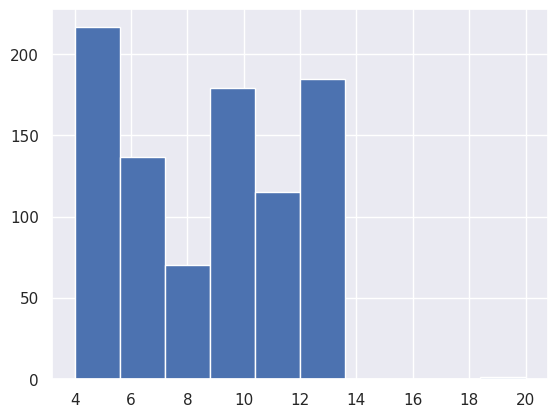

In [48]:
plt.hist(df['tempo envio'])

#### Tempo minimo de envio

In [49]:
df['tempo envio'].min()

4

#### Tempo máximo de envio

In [51]:
df['tempo envio'].max()

20

#### Retornando quais são os outliers

In [52]:
df[df['tempo envio'] == 20 ]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,tempo envio,custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,2091.48,2456.52


#### Criando um novo csv com os dados gerados

In [53]:
df.to_csv('Adventuree_new.csv')